<h3><center><font color = "blue">스마트 홈 관련 코스피 상장사 중 테마주 정보를 중심으로 'Efficient Frontier' 제시</font></h3> 
<h4><p style='text-align: right;'><font color = "blue">(산업분석을 목표로)</font></p></h4>  

_**INTRODUCTION**_
    
    과거 지능형 주택으로 불리던 1990년 경의 스마트 홈 시장은, MicroSoft에 의해, 국내 IT 유수기업 간 모바일 익스플로러(MME) 협력 
    개발이 착수된  2000년 6월 경을 촉매로하여, 스마트홈 시장은 꾸준한 발전 가도 위에 있다. 
    최근 3년 간은 정부 역시 해당시장에 관심도를 높이며, 스마트홈을 포함한 AI 관련 시장에 4.7조원 투자할 만큼, 20년 간 위 시장은 제법 
    안정적인 시장상황을 구축해 왔으며, 지난 발전 동향을 미루어보아, 향 후 미래 역시 안정적인 시장일 것임을 기대할 수 있다.

    그러나, 익히 알 듯, 경제는 급격히 변화하며, 경제상황은 예측할 수 없는 영역이기에, 이를 대비할 대책을 마련하기 위한 취지로, 본 프
    로제트는 시작되었다. 

    본 프로젝트에서는 과거 유수 기업 사이의 주식시장 정보를 활용하여 효율적 투자를 이루기 위한 방책을 제시하고자 한다.
    과거 시장의 변화를 통해 어떤한 변화가 잇따라 왔는지 를 분석하고, 미래 시장에 대한 '기대'와 '실제'가 얼마나 일치될 수 있는지를 예
    측해 보려고한다.

    
_**관련 주식시장 Code정보**_
    
        - 에스원 : 012750
        - HDC 아이콘트롤스 : 039570
        - 경동나비엔 : 009450 
        - 현대리바트 : 079430
        - 엘지전자 : 066570
        - 삼성전자 : 005930
        - 지에스건설 : 006360
        - 에스케이텔레콤 : 017670
        - 케이티 : 030200
        - 엘지유플러스 : 032640

In [19]:
import requests
import pandas as pd
import numpy as np

import datetime as dt
from datetime import date

# For Visualization
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

# Graph's Error fix
plt.rc('font', family='Malgun Gothic') 
plt.rc('axes', unicode_minus=False)

# File Check
import os

In [20]:
def cr_df(company, number = 2):
    # list_1
    df_save = []
    recent_date = ['2021-01-31']
    df_save.append(pd.DataFrame(recent_date, columns=['date']))
    # list_2
    params = []
    for i in range(number):
        params.append({
            'access_key': '21ab33d30ae3b6ebcb1e5727a699f17d',
            'date_to' : df_save[i]['date'].tail(1)
        })
        api_result = requests.get(f'https://api.marketstack.com/v1/tickers/{company}/eod', params[i])
        api_response = api_result.json()
        df_save.append(pd.DataFrame(api_response['data']['eod']))
    return pd.concat(df_save).drop(index=0).reset_index().drop_duplicates("date", keep="first")

In [21]:
stock_info = ['에스원 012750', 
              'HDC아이콘트롤스 039570',
              '경동나비엔 009450', 
              '현대리바트 079430',
              '엘지전자 066570',
              '삼성전자 005930',
              '지에스건설 006360',
              '에스케이텔레콤 017670',
              '케이티 030200',
              '엘지유플러스 032640']

stock_name_list = []
stock_code_list = []
for i in range(len(stock_info)):
    sl = stock_info[i].split(' ')
    stock_name_list.append(sl[0])
    stock_code_list.append(sl[1])
# stock_name_list , stock_code_list    

In [13]:
# 해당 주식정보 불러오기
def c_str(tx):
    return tx + '.XKRX'
symbols = pd.Series(stock_code_list).to_frame()[0].apply(c_str)

Sk_by_comp = []
sym_list = symbols.tolist()
for stock in range(10):
    Sk_by_comp.append(cr_df(sym_list[stock], number = 53))
    Sk_by_comp[stock]['symbol'] = np.repeat(stock_name_list[stock], len(Sk_by_comp[stock]), axis=0)

In [22]:
# 파일 csv변환 및 변환된 파일 불러오기
Sk_by_comp_n = []
for i in range(10):
    sk_name = stock_name_list[i]
#     Sk_by_comp[i].to_csv(f'Data/skinfo_{sk_name}.csv',index=False)
    Sk_by_comp_n.append(pd.read_csv(f'Data/skinfo_{sk_name}.csv'))
# 파일 저장상태 확인
def get_file_list_title(sk_name):
    file_list = []
    for root, dirs, files in os.walk("Data/"):
        for filename in files:
            if filename.startswith(f'skinfo_{sk_name}'):
                file_list.append(filename)
    return sorted(file_list)
for i in range(10):
    print(get_file_list_title(stock_name_list[i]))    
# 각 회사의 마지막 주식 날짜정보 확인
print('Company    ','   index &last_date')
print(65*'-')
for i in range(len(stock_info)):
    print(Sk_by_comp_n[i]['symbol'][0], Sk_by_comp_n[i].tail(1)['date'])    

['skinfo_에스원.csv']
['skinfo_HDC아이콘트롤스.csv']
['skinfo_경동나비엔.csv']
['skinfo_현대리바트.csv']
['skinfo_엘지전자.csv']
['skinfo_삼성전자.csv']
['skinfo_지에스건설.csv']
['skinfo_에스케이텔레콤.csv']
['skinfo_케이티.csv']
['skinfo_엘지유플러스.csv']
Company        index &last_date
-----------------------------------------------------------------
에스원 5246    1999-09-22T00:00:00+0000
Name: date, dtype: object
HDC아이콘트롤스 1310    2015-09-24T00:00:00+0000
Name: date, dtype: object
경동나비엔 5246    1999-10-05T00:00:00+0000
Name: date, dtype: object
현대리바트 3752    2005-11-23T00:00:00+0000
Name: date, dtype: object
엘지전자 4640    2002-04-24T00:00:00+0000
Name: date, dtype: object
삼성전자 5246    1999-10-21T00:00:00+0000
Name: date, dtype: object
지에스건설 5246    1999-10-26T00:00:00+0000
Name: date, dtype: object
에스케이텔레콤 5246    1999-10-22T00:00:00+0000
Name: date, dtype: object
케이티 5246    1999-10-26T00:00:00+0000
Name: date, dtype: object
엘지유플러스 5016    2000-10-06T00:00:00+0000
Name: date, dtype: object


---

In [23]:
# 년 월 일 데이터만 선별하여 Date time 화 하고 이를 시계열 분석을 위해 Index로 설정
for j in range(10) :
    Sk_by_comp_n_each = Sk_by_comp_n[j].copy()

    Date_list = []
    for i in range(Sk_by_comp_n_each.shape[0]):
        semi_r = Sk_by_comp_n_each.iloc[:,1][i].split('T')
        semi_r_n = dt.datetime.strptime(semi_r[0], '%Y-%m-%d').date()
        Date_list.append(semi_r_n)
    print(Sk_by_comp_n_each['symbol'][0], 'Number of rows and columns')        
    print(Sk_by_comp_n_each.shape)
    Sk_by_comp_n_each['date'] = Date_list
    Sk_by_comp_n_each.set_index('date', inplace=True)
    Sk_by_comp_n[j] = Sk_by_comp_n_each
print(65*'-')
for date in range(len(Sk_by_comp_n)):
    company = Sk_by_comp_n[date]['symbol'][0]
    print(f'{company}_Confirm the final result: ', Sk_by_comp_n[date].index[-1])

에스원 Number of rows and columns
(5247, 14)
HDC아이콘트롤스 Number of rows and columns
(1311, 14)
경동나비엔 Number of rows and columns
(5247, 14)
현대리바트 Number of rows and columns
(3753, 14)
엘지전자 Number of rows and columns
(4641, 14)
삼성전자 Number of rows and columns
(5247, 14)
지에스건설 Number of rows and columns
(5247, 14)
에스케이텔레콤 Number of rows and columns
(5247, 14)
케이티 Number of rows and columns
(5247, 14)
엘지유플러스 Number of rows and columns
(5017, 14)
-----------------------------------------------------------------
에스원_Confirm the final result:  1999-09-22
HDC아이콘트롤스_Confirm the final result:  2015-09-24
경동나비엔_Confirm the final result:  1999-10-05
현대리바트_Confirm the final result:  2005-11-23
엘지전자_Confirm the final result:  2002-04-24
삼성전자_Confirm the final result:  1999-10-21
지에스건설_Confirm the final result:  1999-10-26
에스케이텔레콤_Confirm the final result:  1999-10-22
케이티_Confirm the final result:  1999-10-26
엘지유플러스_Confirm the final result:  2000-10-06


#### Volume Trend Visualization

##### Volume Trend를 확인 하기 전에 각각의  Volume(거래량)에 대한 이상치를 Model을 통해 확인하다.

_**적용 모델 목록**_
    - ARIMA Model을 통한 계절성 값 분석
    - IForest
    

##### <font color = "blue">ARIMA For Anomaly Detection of Volume Trend</font> 

###### Rolling 하여 전반적인 추세선 확보

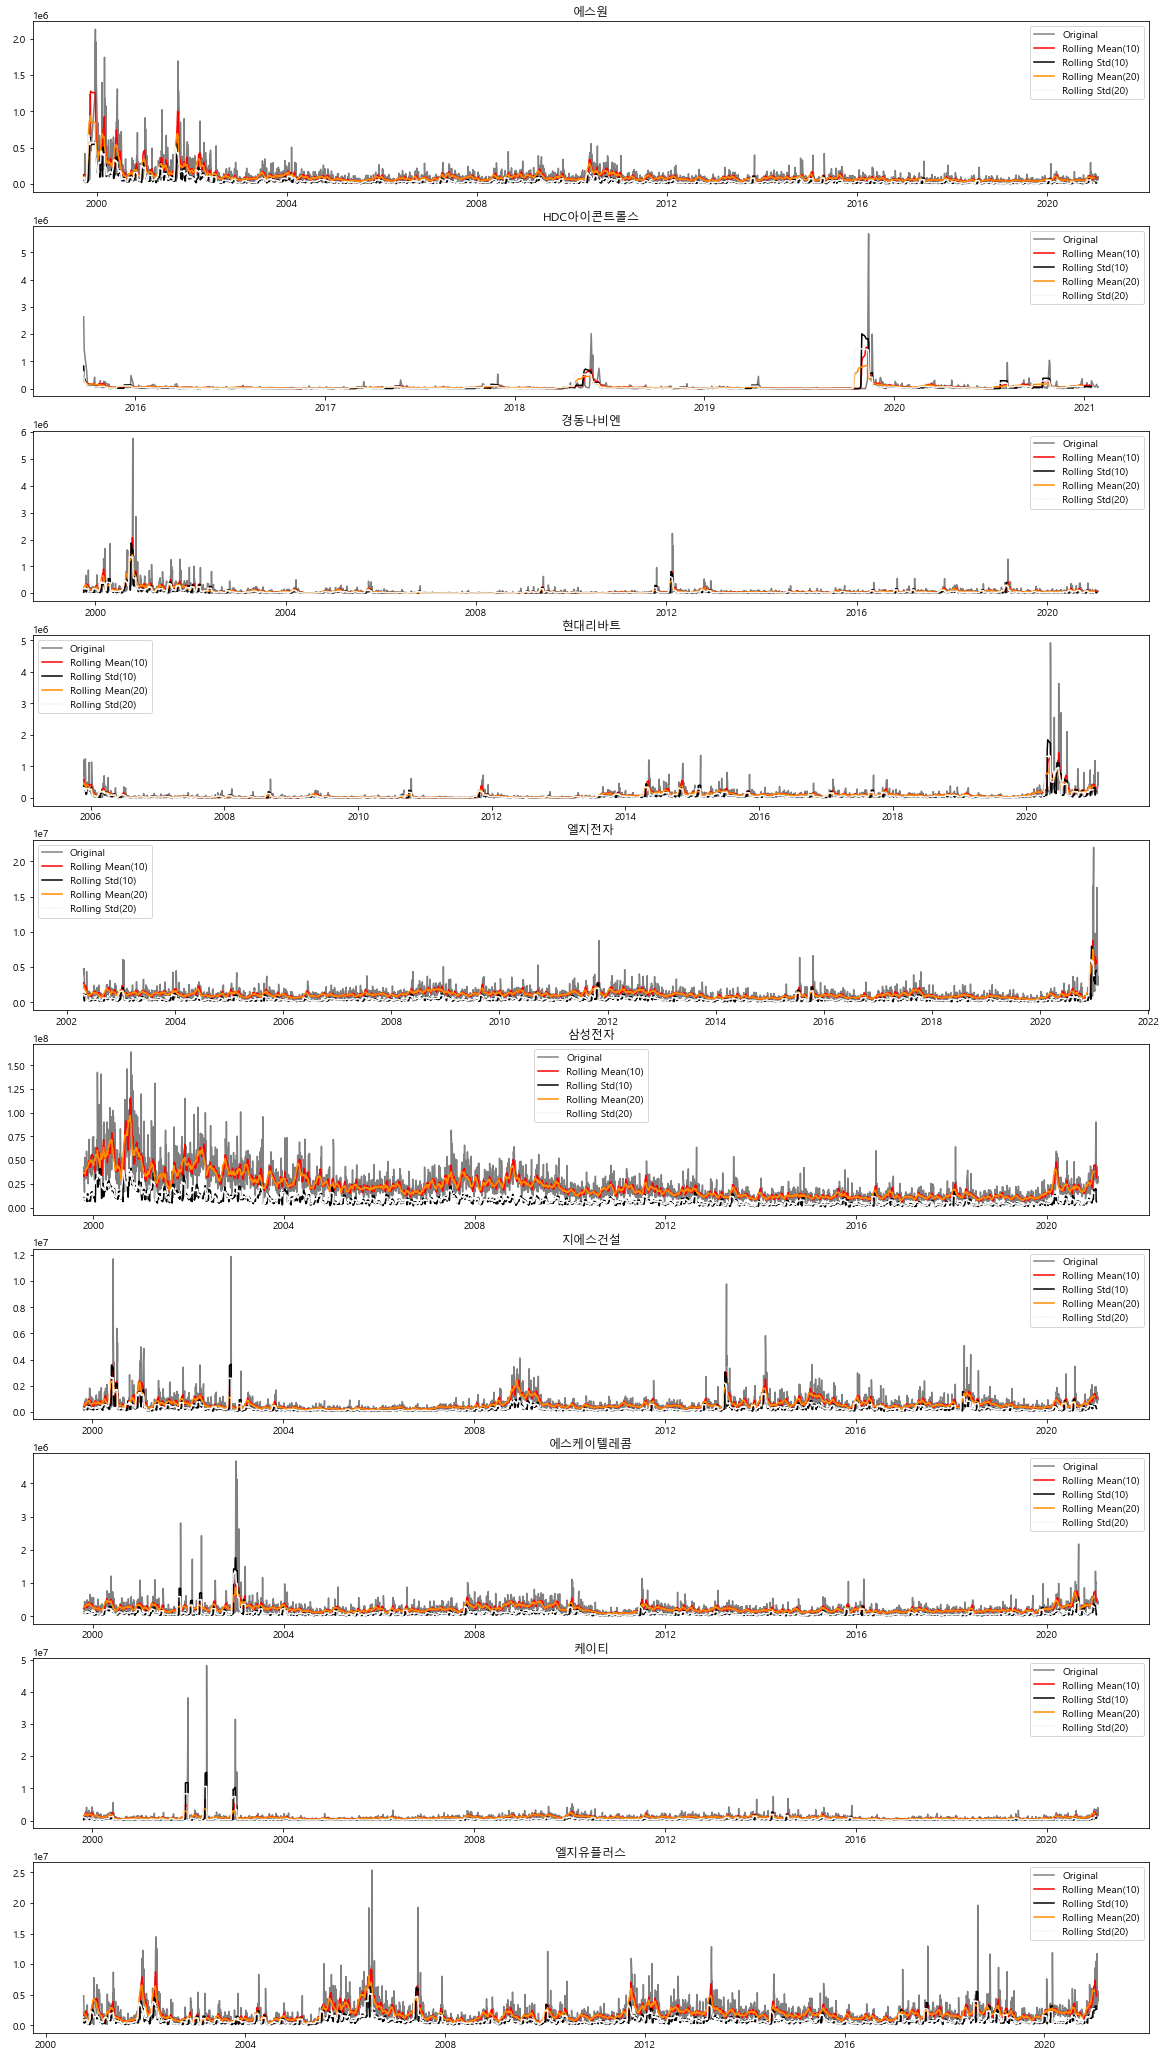

In [9]:
# 이동편균선
Sk_by_comp_n_cp = Sk_by_comp_n.copy()
fig = plt.figure(figsize=(20,37))
for i in range(len(Sk_by_comp_n_cp)):
    ax = plt.subplot(10,1,i+1)
    r_mean_1 = Sk_by_comp_n[i]["volume"].rolling(10).mean()
    r_mean_2 = Sk_by_comp_n[i]["volume"].rolling(20).mean()
    r_std_1 = Sk_by_comp_n[i]["volume"].rolling(10).std()
    r_std_2 = Sk_by_comp_n[i]["volume"].rolling(20).std()
    orig = plt.plot(Sk_by_comp_n[i]["volume"], color='gray',label='Original')
    mean = plt.plot(r_mean_1, color='red', label='Rolling Mean(10)')
    std = plt.plot(r_std_1, color='black', label = 'Rolling Std(10)')
    mean_ = plt.plot(r_mean_2, color='darkorange', label='Rolling Mean(20)')    
    std_ = plt.plot(r_std_2, color='whitesmoke', label = 'Rolling Std(20)')
    ax.set_title(str(Sk_by_comp_n_cp[i]['symbol'][0]))
    plt.legend(loc='best')

###### ACF, PACF 를 통한 Stationarity 확인


            
_**기대값과 분산은, Time에 의해 파생된 것이 아니므로, 시간역에서 확률분포가 일정해야한다.**_
- $X_1, X_2, ..., X_t$ a **sequence of a random variable 가정** 
- $E(x_t) = \mu, \;\;V(x_t) = \sigma_x^2$
\
\
$Pa(h) = \left\{\begin{array}\\ 
            1, \;\;\;Where \;\; h=0\\    
            0, \;\;\;Where \;\; h \neq 0
            \end{array}
            \right.$
\
\
\
**- 하단은 각 회사 주식의 Volume(거래량)을 중심으로 ACF 와 PACF 값을 결과시 한 것이다.
특히, ACF 값을 통해 확인 할 수 있었던 것은 에스원,  지에스건설, 엘지유플러스가 지속적으로 감소하는 값을 가진 것으로 보아 None-
Stationary 함을 확인할 수 있었다. 
본 분석가는, 상단의 이동평균을 통해 확보한 추세선을 통해서는 '에스원'의 거래량이 전반적으로 평이하다고 생각하였으나, 
ACF를 통해 Non-Stationary가 확인되므로, 2000년 초 경의 높은 값들이 이 외의 동향에 비해 상대적으로 매우 큰 거래에 해당했던 것임을 
유추할 수 있었다.
더불어, '지에스건설'과 '엘지유플러스'는 상대적으로 많은 거래량이 있던 시기가 눈에 띄게 확인되고있다.**   

---

_**St1 : Accumulative standard deviation**_ \
\
$v = \frac{\sum_{i=1}^{n} \;(X_t - \overline{X})}{n}$

    - wd = 'window' : window 값은 순차적으로 넓혀지며, 해당 std(표준편차) 해당 기간의 표준편차값을 확보.

_**St2 : Diff between standard deviations**_

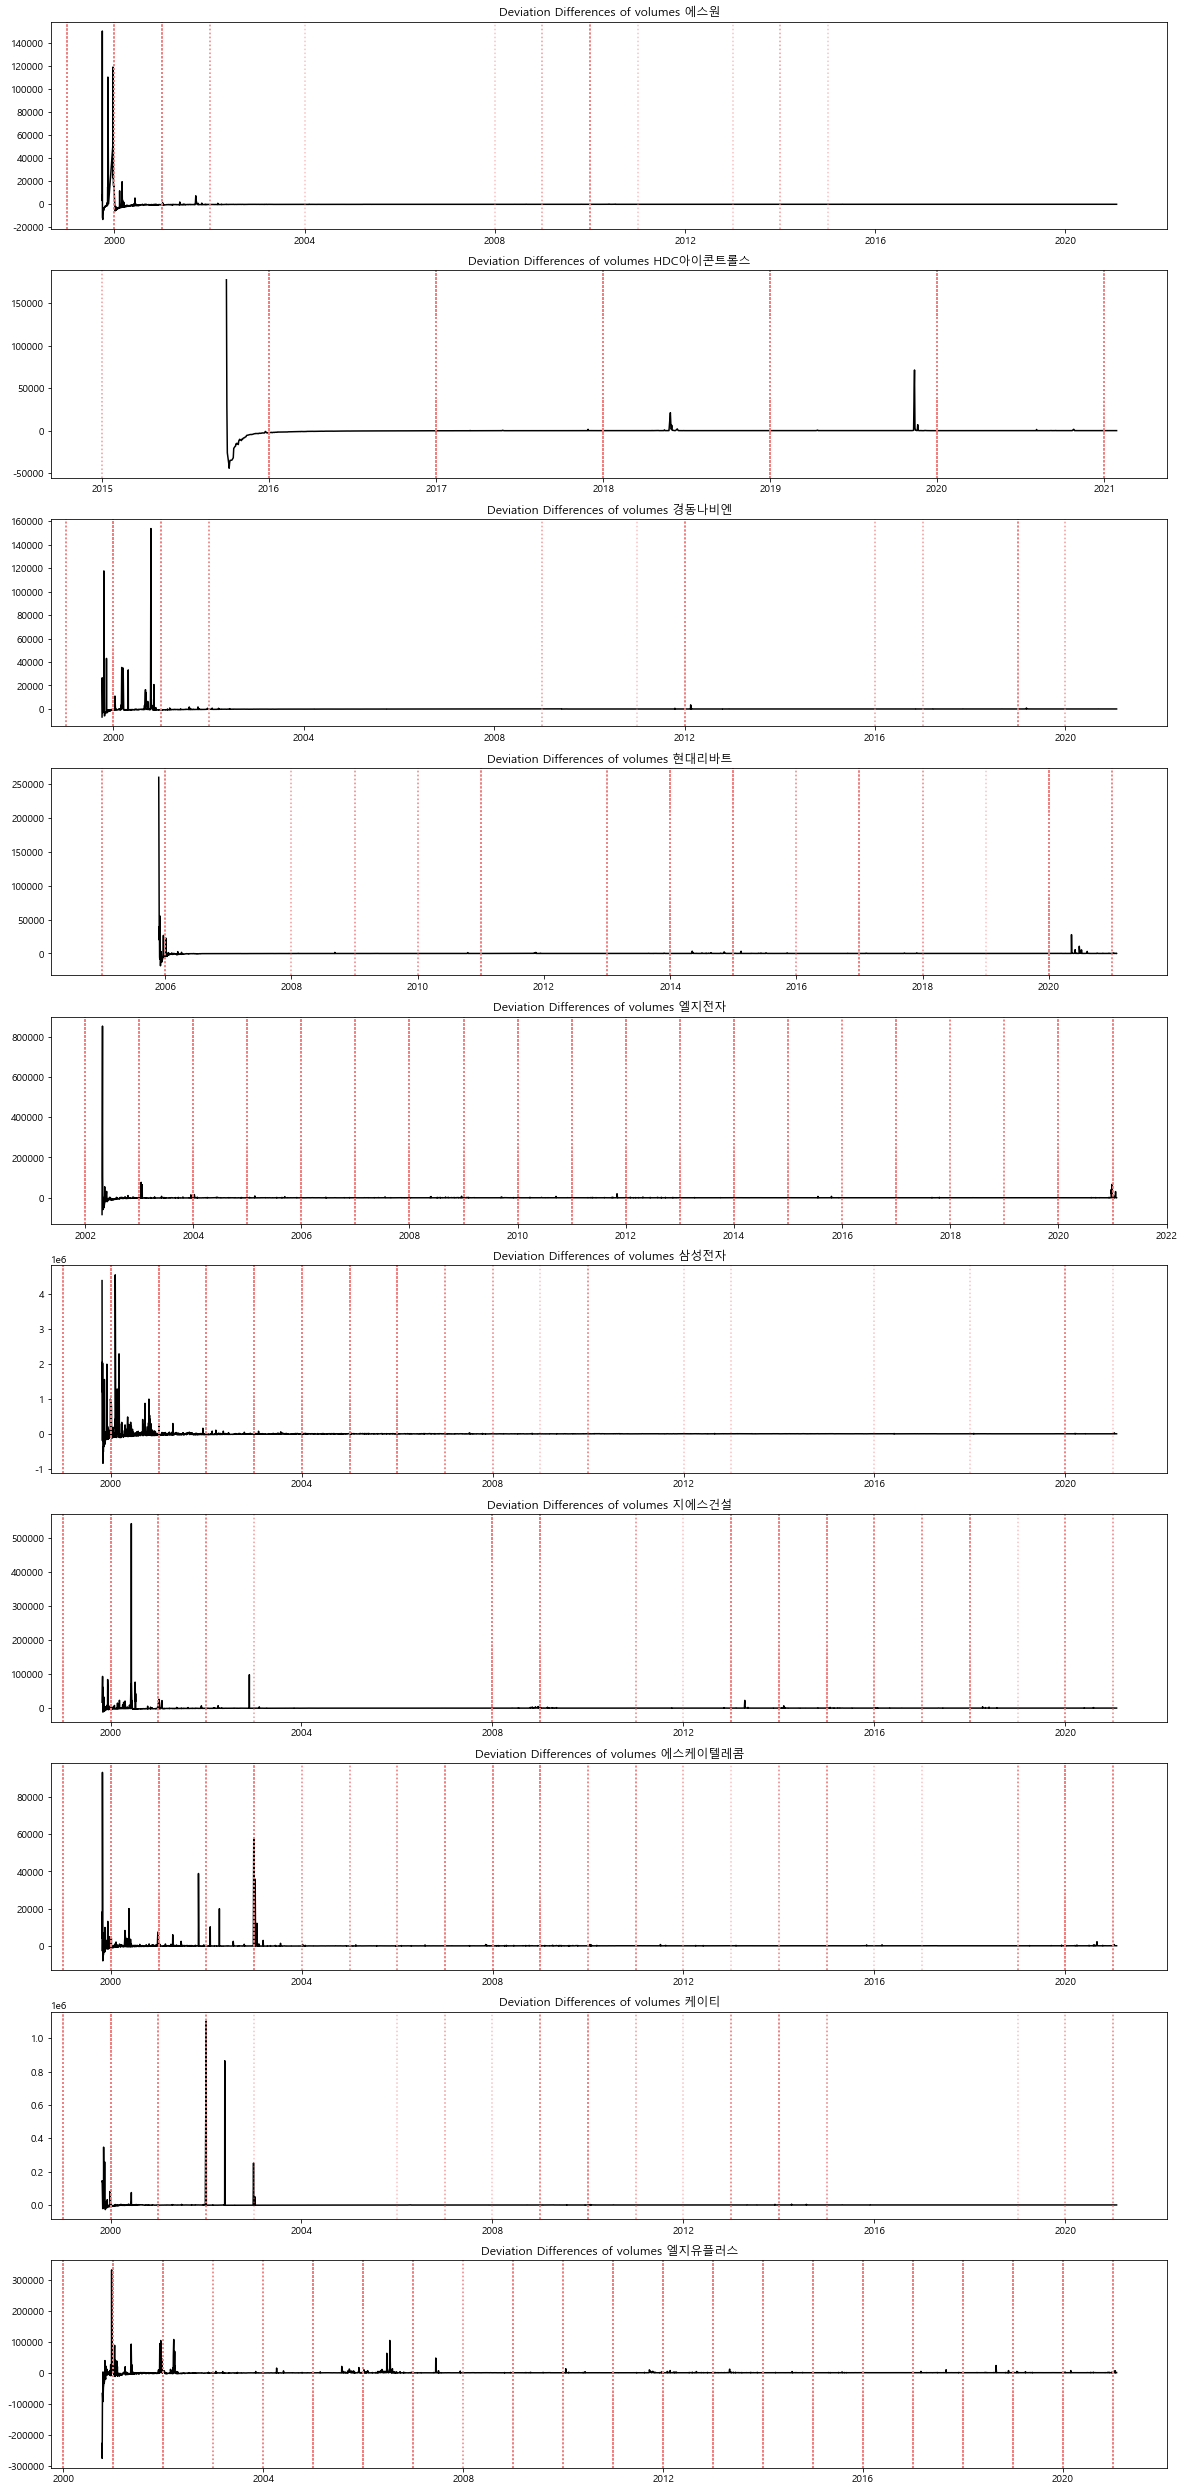

In [10]:
fig = plt.figure(figsize=(20,45))
for company in range(len(Sk_by_comp_n)):
    ax = plt.subplot(10,1,company+1)
    Test_table = Sk_by_comp_n[company].sort_values(by="date",ascending=True)
    V_deviations = pd.Series(dtype=float, index = Test_table.index)        
    for DT in V_deviations.index:
        wd = Test_table.loc[:DT]["volume"]
        V_deviations.loc[DT] = wd.std()
    V_deviations_diff = V_deviations.diff().dropna()
    # Visualization process    
    plt.plot(V_deviations_diff, color='black')
    ax.set_title(str('Deviation Differences of volumes ' + Sk_by_comp_n[company]['symbol'][0]))
    # Relatively outstanding different periodic values        
    T = V_deviations_diff[V_deviations_diff > np.mean(V_deviations_diff)].index
    for i in range(len(T) -1):
        year = T[i].year
        plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='lightcoral', linestyle=':', alpha=0.5)

_**St3 : 편차에 대하여 월별 추이 확인**_

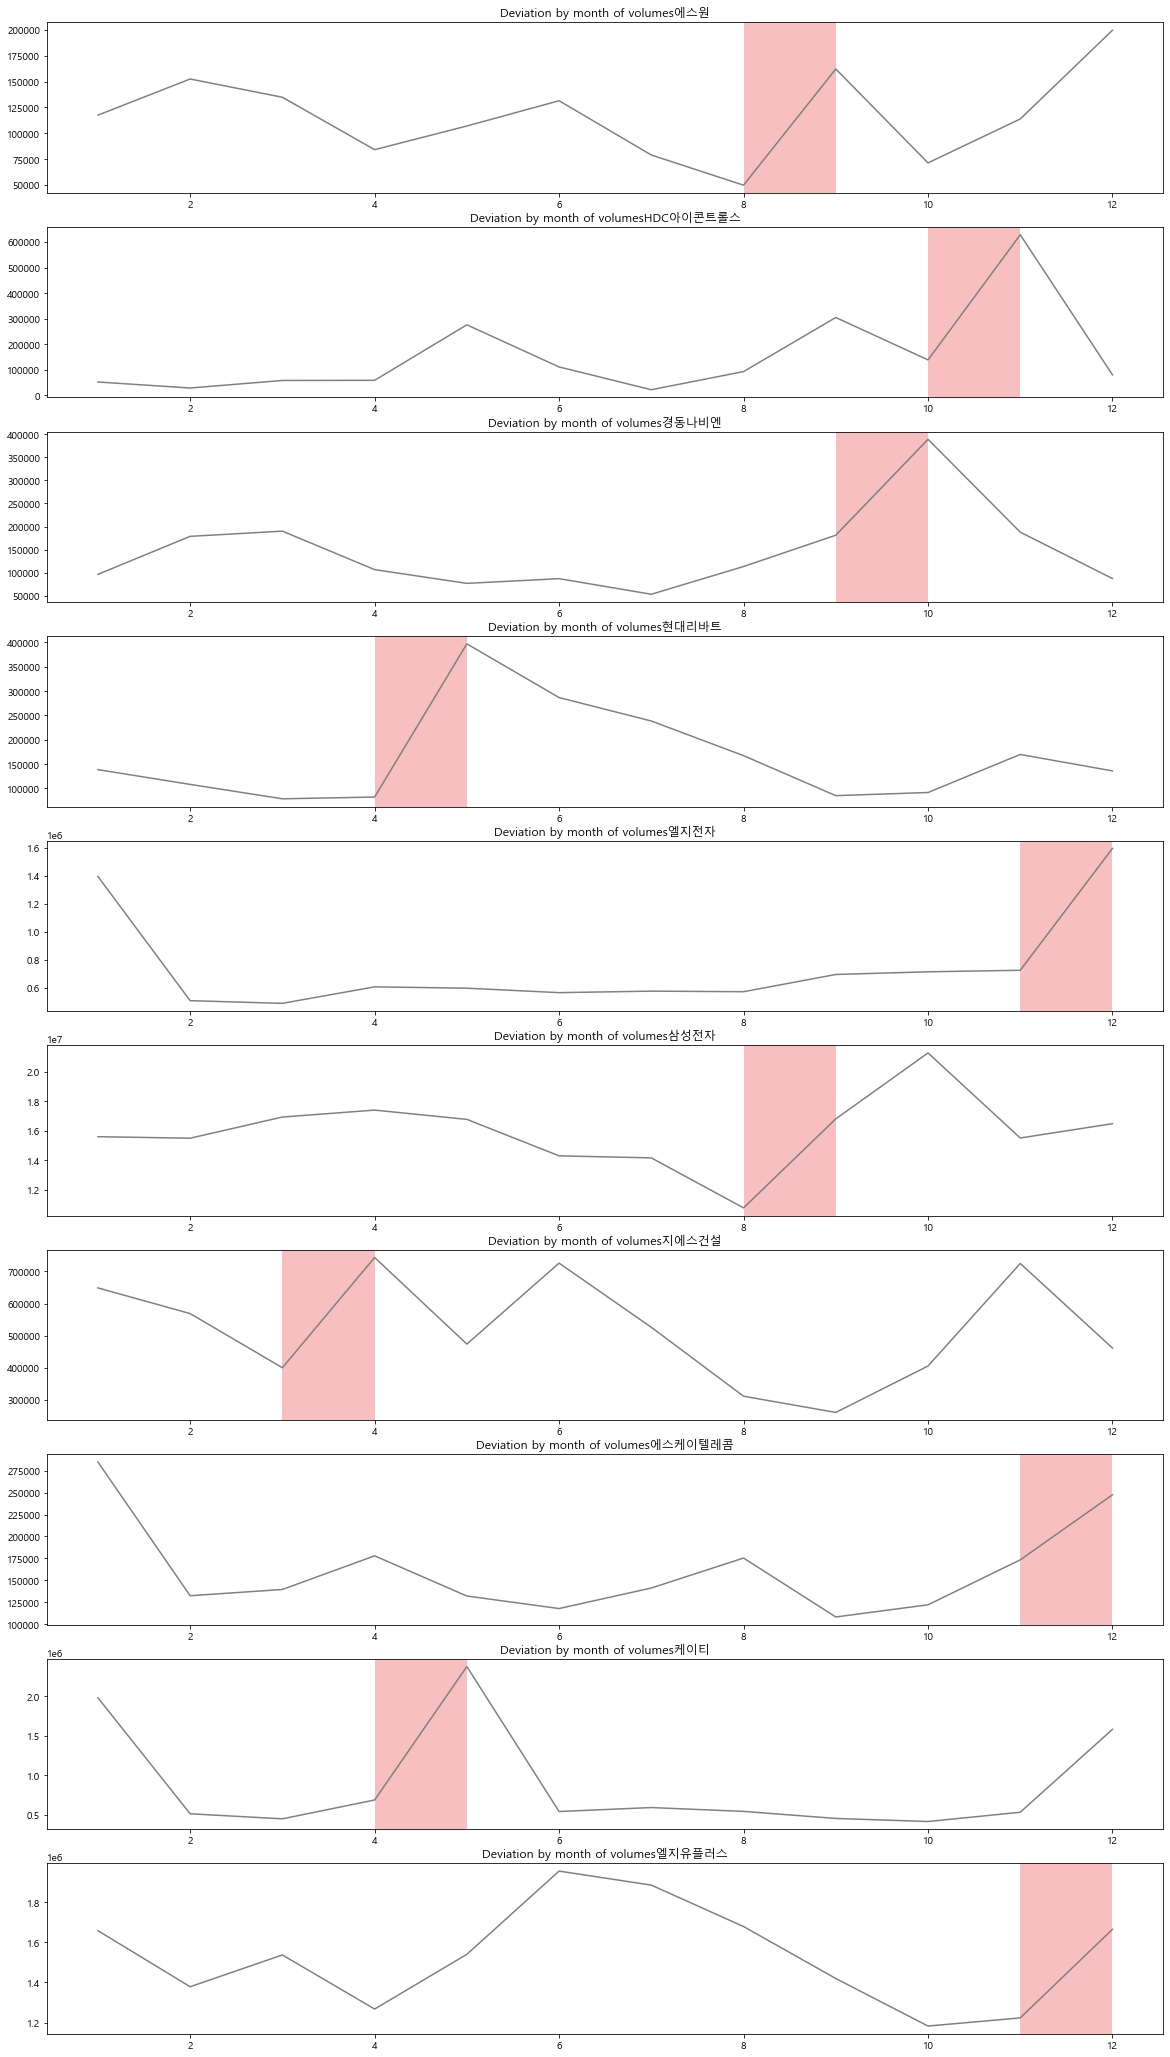

In [11]:
fig = plt.figure(figsize = (20,37))
for company in range(len(Sk_by_comp_n)):
    ax = plt.subplot(10,1,company+1)
    M_deviations = Sk_by_comp_n[company]['volume'].groupby(lambda x : x.month).std()
    t = np.where(M_deviations.diff() == M_deviations.diff().max())
    plt.plot(M_deviations, color='gray')
    ax.axvspan(t[0][0], t[0][0] +1, facecolor='lightcoral', alpha=0.5)
    ax.set_title(str('Deviation by month of volumes' + Sk_by_comp_n[company]['symbol'][0]))    

In [30]:
# Specified 'date' select automatically
for j in range(10) :
    Sk_by_comp_n_each = Sk_by_comp_n[j].copy()
    SARIMA_t = []
    for i in range(len(Sk_by_comp_n_each)):    
        # 20년 동안의 각 회사별 각 Month(1월 ~ 12월) volume(거래량) 정보에 대한 std 산출     
        M_deviations = Sk_by_comp_n_each['volume'].groupby(lambda x : x.month).std()
        # 각 Month(1월 ~ 12월) volume(거래량)의 std 정보에 대한 diff 산출
        t = M_deviations.diff()
        # diff 값이 가장 큰 월에 대한 정보들을 본 데이터 프레임에서 True / False로 구분
        SARIMA_t.append(Sk_by_comp_n_each.index[i].month == np.where(t == M_deviations.diff().max())[0][0] +1)
    # 구분된 정보만을 추출
    result = Sk_by_comp_n_each.loc[Sk_by_comp_n_each.index[SARIMA_t]].sort_values(by='date',ascending=True)['volume']
    # 해당 일자를 제외한 나머지 일자 간의 std 값 중 가장 작은 값을 유도하는 일자가 가장 거래량의 변화가 큰 기간으로 추정
    # 위와 같은 놀리로, Anomaly detection 진행
    SARIMA_std = []
    value_anomaly = []
    for dte in result.index:
        stdt = result[result.index != dte]
        SARIMA_std.append(stdt.std())
    d = {'col1': result.index, 'col2': SARIMA_std}    
    dev_frame = pd.DataFrame(d)
    value_anomaly = dev_frame[dev_frame['col2'] == min(SARIMA_std)]['col1']

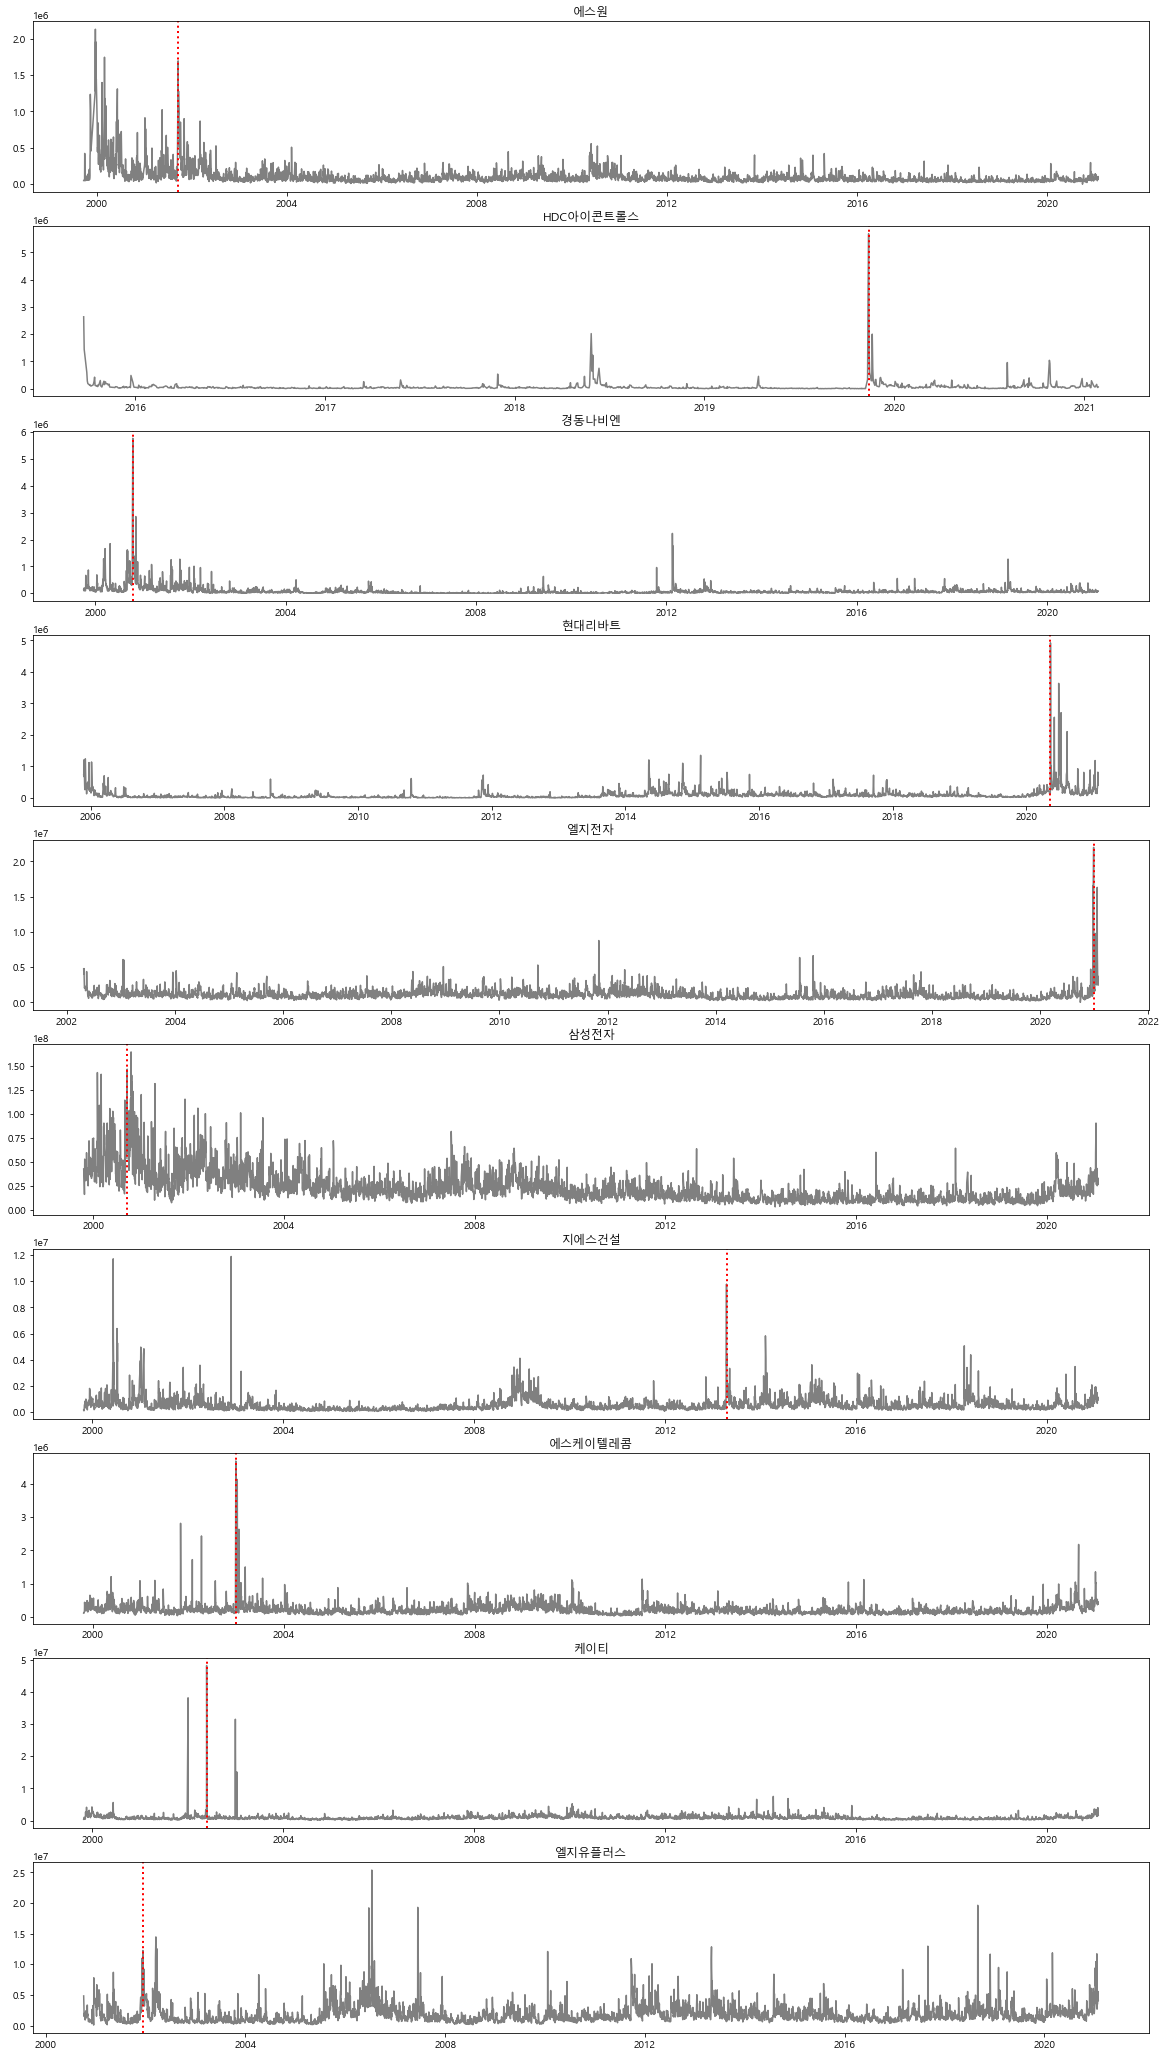

In [176]:
# Specified 'date' select automatically
fig = plt.figure(figsize=(20,37))
for j in range(10) :
    Sk_by_comp_n_each = Sk_by_comp_n[j].copy()
    SARIMA_t = []
    for i in range(len(Sk_by_comp_n_each)):    
        # 20년 동안의 각 회사별 각 Month(1월 ~ 12월) volume(거래량) 정보에 대한 std 산출     
        M_deviations = Sk_by_comp_n_each['volume'].groupby(lambda x : x.month).std()
        # 각 Month(1월 ~ 12월) volume(거래량)의 std 정보에 대한 diff 산출
        t = M_deviations.diff()
        # diff 값이 가장 큰 월에 대한 정보들을 본 데이터 프레임에서 True / False로 구분
        SARIMA_t.append(Sk_by_comp_n_each.index[i].month == np.where(t == M_deviations.diff().max())[0][0] +1)
    # 구분된 정보만을 추출
    result = Sk_by_comp_n_each.loc[Sk_by_comp_n_each.index[SARIMA_t]].sort_values(by='date',ascending=True)['volume']
    
    # 해당 일자를 제외한 나머지 일자 간의 std 값 중 가장 작은 값을 유도하는 일자가 가장 거래량의 변화가 큰 기간으로 추정
    # 위와 같은 놀리로, Anomaly detection 진행
    SARIMA_std = []
    value_anomaly = []
    for dte in result.index:
        stdt = result[result.index != dte]
        SARIMA_std.append(stdt.std())
    d = {'col1': result.index, 'col2': SARIMA_std}    
    dev_frame = pd.DataFrame(d)
    value_anomaly_x = dev_frame[dev_frame['col2'] == min(SARIMA_std)]['col1']
#     value_anomaly_y = dev_frame[dev_frame['col2'] == min(SARIMA_std)]['col2']
    
    a = str(value_anomaly_x)
    t = pd.DataFrame({'year' : [a.split('-')[0][-4:]], 'month' : [a.split('-')[1]], 'day' : [a.split('-')[2][0:2]]})
    value_anomaly_n = pd.to_datetime(t)
    
    # Visualization     
    ax = plt.subplot(10,1,j+1)
    plt.plot(Sk_by_comp_n[j]["volume"], color='gray',label='Original')
    plt.axvline(value_anomaly_n, color='red', linestyle=':', alpha=1, lw = 2)
    plt.annotate(f'',xy=(-1,-1),xytext=(0,0),
             arrowprops=dict(arrowstyle='->',lw=1.5))

    ax.set_title(str(Sk_by_comp_n[j]['symbol'][0]))

In [134]:
# pd.to_datetime(value_anomaly)
a = str(value_anomaly)
t = pd.DataFrame({'year' : [a.split('-')[0][-4:]], 'month' : [a.split('-')[1]], 'day' : [a.split('-')[2][0:2]]})
value_anomaly = pd.to_datetime(t)
value_anomaly

0   2001-12-13
dtype: datetime64[ns]

In [172]:
dev_frame

,col1,col2
0,2000-12-01,1.665876e+06
1,2000-12-04,1.665706e+06
2,2000-12-05,1.665489e+06
3,2000-12-06,1.666943e+06
4,2000-12-07,1.667319e+06
...,...,...
414,2020-12-23,1.654860e+06
415,2020-12-24,1.665871e+06
416,2020-12-28,1.657742e+06
417,2020-12-29,1.662854e+06
